In [12]:
import tensorflow as tf
from tensorflow.python.ops.rnn import _transpose_batch_time

from datetime import datetime
import numpy as np
import pandas as pd
import glob, os, sys, math, warnings, copy, time, glob, pickle
import matplotlib.pyplot as plt
os.environ["TF_CPP_MIN_LOG_LEVEL"]="3"

# customized ftns 
from preprocessing import *
from sequencing import get_sequences, get_minibatches, iterate_minibatches, subsample_sequence
from utilities import *
from model import *
from train import train_all_single_policies
# ---------------------------------------------------------
%matplotlib inline
%load_ext autoreload
%autoreload 2
warnings.filterwarnings('ignore')
# warnings.filterwarnings(action='once')
# ---------------------------------------------------------
# directories
main_dir = '../'
game_dir = main_dir+'data/'
Data = LoadData(main_dir, game_dir)
models_path = './models/' 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Pre-process 
filter events, subsample frames, add velocity, reorder moments, re-arrange team order
shot clock, filter out event with short moments; also hidden role learning

In [2]:
# all game ids file name
all_games_id = [i.split('/')[-1].split('.')[0] for i in glob.glob('../data/*.pkl')]

In [3]:
# all_games_id = ['0021500024']

In [5]:
# event with frames less than the threshold will be removed
event_threshold = 100
# since 25 frames/sec is probably too much so downsample by two
subsample_factor = 2
# save the processed file to disk to avoid repeated work
game_files = './all_games_{0}_{1}_{2}.pkl'.format(len(all_games_id), event_threshold, subsample_factor)
if os.path.isfile(game_files):
    with open(game_files, 'rb') as f:
        game_data = pickle.load(f)
else:
    game_data = process_game_data(Data, all_games_id, event_threshold, subsample_factor)
    with open(game_files, 'wb') as f:
        pickle.dump(game_data, f)
print('Final number of events:', len(game_data))

Final number of events: 6485


### Show the plot, for the sake of comparison with processed moment later on

In [6]:
# choose a game id for a quick plot
game_id = all_games_id[0]
Plot = PlotGame(game_id, main_dir, game_dir)

In [7]:
plt_ind = 0

0


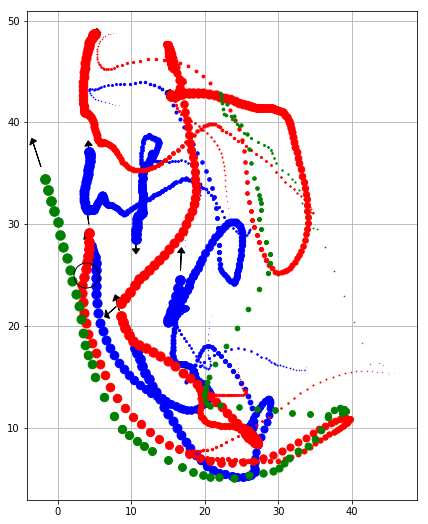

In [8]:
# manual plot check
print(plt_ind)
plot_check(game_data, plt_ind)
plt_ind += 1

#### Build graph and starts training for all single policies (in total five)

In [9]:
# Build graph and starts training for all single policies
sequence_length = 50
overlap = 25
batch_size = 128

hyper_params = {'use_model': 'dynamic_rnn_layer_norm',
                'batch_size': batch_size,
                'sequence_length': sequence_length,
                'overlap': overlap,
                'state_size': [128, 128],
                'use_peepholes': None,
                'input_dim': 179,
                'dropout_rate':0.6,
                'learning_rate': 0.001,
                'n_epoch': int(1e3)}

train_all_single_policies(game_data, hyper_params, models_path)

2018-05-21 15:03:33,696 | INFO : Training with hyper parameters: 
{'use_model': 'dynamic_rnn_layer_norm', 'batch_size': 128, 'sequence_length': 50, 'overlap': 25, 'state_size': [128, 128], 'use_peepholes': None, 'input_dim': 179, 'dropout_rate': 0.6, 'learning_rate': 0.001, 'n_epoch': 1000}
2018-05-21 15:03:33,697 | INFO : Wroking on policy 0
(49, 179) <class 'numpy.ndarray'> <class 'numpy.ndarray'> (49, 2)
2018-05-21 15:03:34,891 | INFO : train len: 20546 | test shape: 5137
2018-05-21 15:03:37,424 | INFO : Horizon 0 ==========
2018-05-21 15:03:55,243 | INFO : Epoch 0    | loss: 284.48   | time took: 16.74s | validation loss: 140.04  
2018-05-21 15:06:41,812 | INFO : Epoch 10   | loss: 5.25     | time took: 16.80s | validation loss: 4.30    
2018-05-21 15:09:27,638 | INFO : Epoch 20   | loss: 3.97     | time took: 16.28s | validation loss: 3.63    
2018-05-21 15:12:11,698 | INFO : Epoch 30   | loss: 3.53     | time took: 16.29s | validation loss: 3.46    
2018-05-21 15:14:55,802 | INFO

2018-05-21 18:18:02,894 | INFO : Epoch 710  | loss: 0.56     | time took: 16.28s | validation loss: 1.72    
2018-05-21 18:20:48,289 | INFO : Epoch 720  | loss: 0.55     | time took: 16.48s | validation loss: 1.53    
2018-05-21 18:23:37,319 | INFO : Epoch 730  | loss: 0.55     | time took: 16.71s | validation loss: 1.41    
2018-05-21 18:26:26,501 | INFO : Epoch 740  | loss: 0.54     | time took: 16.80s | validation loss: 1.52    
2018-05-21 18:29:13,638 | INFO : Epoch 750  | loss: 0.53     | time took: 16.73s | validation loss: 1.43    
2018-05-21 18:32:02,568 | INFO : Epoch 760  | loss: 0.53     | time took: 16.34s | validation loss: 1.52    
2018-05-21 18:34:47,097 | INFO : Epoch 770  | loss: 0.52     | time took: 16.31s | validation loss: 1.46    
2018-05-21 18:37:31,271 | INFO : Epoch 780  | loss: 0.51     | time took: 16.31s | validation loss: 1.45    
2018-05-21 18:40:15,375 | INFO : Epoch 790  | loss: 0.51     | time took: 16.32s | validation loss: 1.60    
2018-05-21 18:42:59

### Check performance

In [13]:
# pad short sequence and chunk long sequence with overlaps
policy = 0
train, target = get_sequences(game_data, policy, sequence_length, overlap)
# create train and test set
p = 0.8 # train percentage
divider = int(len(train)*p)
train_game, test_game = np.copy(train[:divider]), np.copy(train[divider:])
train_target, test_target = np.copy(target[:divider]), np.copy(target[divider:])
Model = ImportGraph('policy0/')

./models/model
INFO:tensorflow:Restoring parameters from ./models/policy0/model
2018-05-21 19:38:05,996 | INFO : Restoring parameters from ./models/policy0/model


In [14]:
n = 0

### Manual plot check again

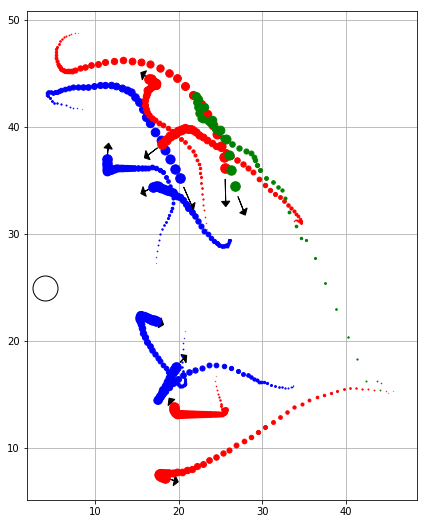

In [15]:
plot_check(train_game, n)
n+=1

#### Plot out role trajectory prediction (*green*) vs true trajectory (*blue*)
The points jumps since its not per play but per role, which could be switched around during the game

rand checking index: 137 out of 160


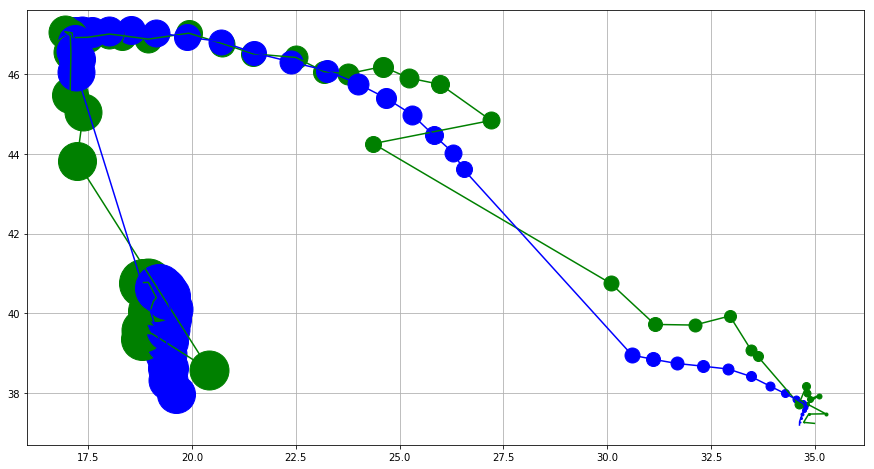

In [35]:
# use while loop to make sure the 
train_batches = get_minibatches(train_game, train_target, batch_size, shuffle=False)

check_ind = np.random.randint(0, len(train_game)//batch_size)
print('rand checking index: {0:} out of {1:}'.format(check_ind, len(train_game)//batch_size))

input_xi, output_yi = train_batches

y_pred = Model.forward_pass(input_xi[check_ind], h=1)
y_true = output_yi[check_ind]
    
y_pred = y_pred[0][0].reshape(-1,2)
y_true = y_true[0].reshape(-1,2)

plt.figure(figsize=(15,8))
for k in range(0, len(y_pred)):
    plt.plot(y_pred[:, 0][k], y_pred[:, 1][k], linestyle="None", marker="o", markersize=k, color='g')
    plt.plot(y_true[:, 0][k], y_true[:, 1][k], linestyle="None", marker="o", markersize=k, color='b')

plt.plot(y_pred[:, 0], y_pred[:, 1],'g', y_true[:,0], y_true[:,1], 'b')
plt.grid(True)

### To do:

    1) Try to see if smoothing traajectory is possible
    2) Look into end-to-end training